In [21]:
import utils
from torchdyn.core import NeuralODE
import pytorch_lightning as pl
import torch
import torch.nn as nn
import psd

In [2]:
device = torch.device("cuda:0")
torch.set_default_dtype(torch.float64)
torch.set_float32_matmul_precision("high")

In [3]:
def get_model_l63():
    layers = [
        nn.Linear(3, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 3),
    ]
    f = nn.Sequential(*layers)
    model = NeuralODE(f, sensitivity="adjoint")
    return model

In [4]:
model = utils.Learner(
    model=get_model_l63(),
    t_span=torch.linspace(0, 1, 2),
    lr=1e-2,
    loader=utils.get_loader_l63(),
)
trainer = pl.Trainer(max_epochs=100, accelerator="gpu", devices="auto")
trainer.fit(model)

raw data shapes -- train: (100000, 3), test: (100000, 3)
train shapes -- x: torch.Size([99999, 3]), y: torch.Size([99999, 3])


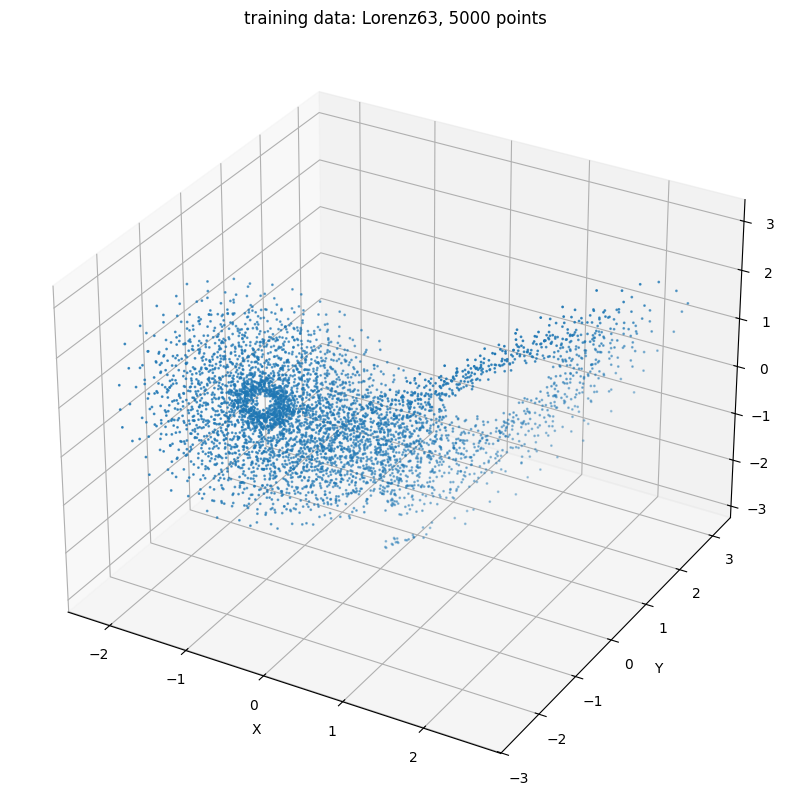

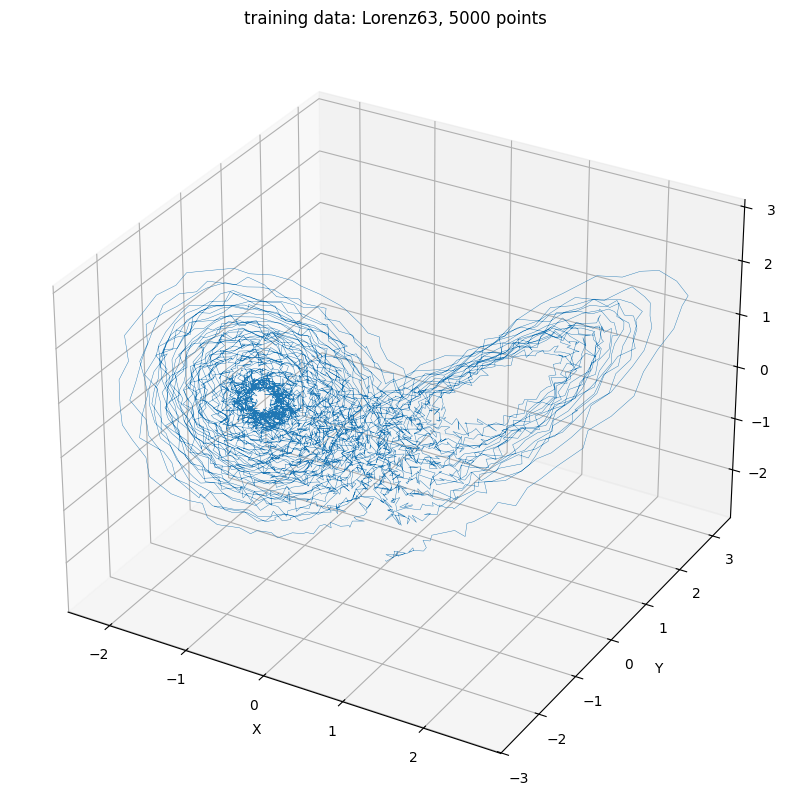

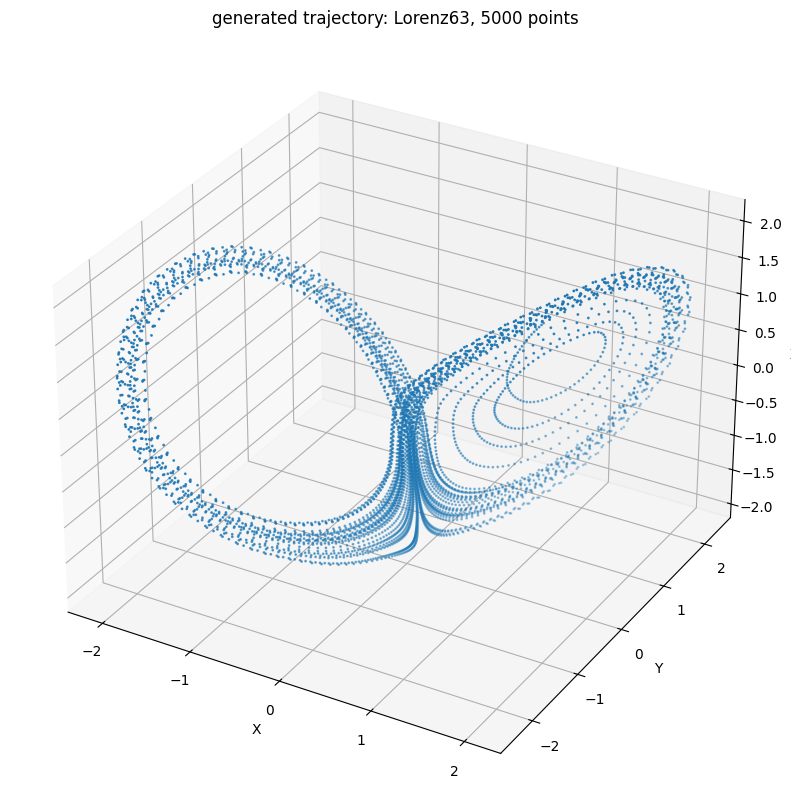

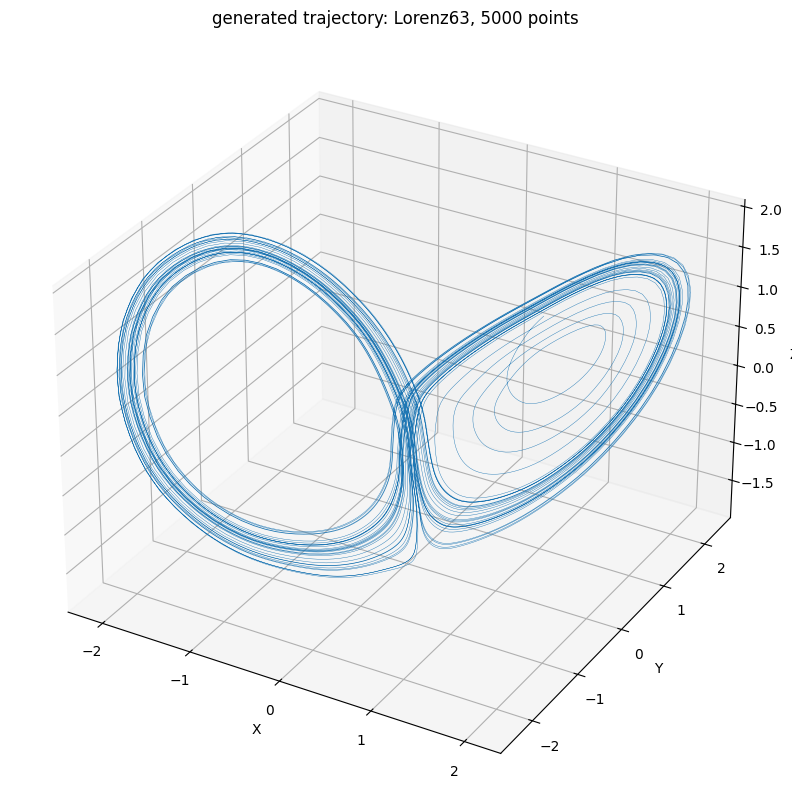

In [20]:
n_timesteps = 5000
preds = utils.make_trajectory(model, [1, 1, 1], n_timesteps=n_timesteps)
utils.get_loader_l63(True, n_points=n_timesteps)
utils.plot_l63(preds, title="generated trajectory", style="scatter")
utils.plot_l63(preds, title="generated trajectory", style="line")

In [ ]:
psd.power_spectrum_error(preds,trai